In [44]:
import pandas as pd
import string
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/darklord/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darklord/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/darklord/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/darklord/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('twitter.csv')
print(df.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [4]:
vocabulary = set()
def pre_process(text):
    global count
    text = text.strip()
    result = ""
    for char in text:
        if (char.isalpha() and char in string.ascii_letters) or char == ' ':
            result += char
    word_tokens = word_tokenize(result)
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    pos_tags = pos_tag(filtered_sentence)
    lemmatized_words = [
        lemmatizer.lemmatize(word, pos='v') if tag.startswith('V')  
        else lemmatizer.lemmatize(word, pos='n') if tag.startswith('N')
        else lemmatizer.lemmatize(word, pos='a') if tag.startswith('J')
        else word
        for word, tag in pos_tags
    ]
    update_vocabulary(lemmatized_words)
    return ' '.join(lemmatized_words)
def update_vocabulary(tokens):
    global vocabulary
    vocabulary.update(tokens)
def create_vocab():
    global vocabulary
    vocabulary = list(vocabulary)
    dict1 = {}
    for i in range(1, len(vocabulary)+1):
        dict1.update({vocabulary[i-1]:i})
    return dict1
def tokenize(text):
    global vocab
    word_tokens = word_tokenize(text)
    return [vocab[w] for w in word_tokens]
def standardize(text):
    global vocab
    if len(text) < 9:
        while len(text) != 9:
            text.append(vocab['<PAD>'])
    return text[:9]
    

In [5]:
df['tweet'] = df['tweet'].apply(pre_process)
vocab = create_vocab()
temp = len(vocab)
df['tweet'] = df['tweet'].apply(tokenize)
vocab.update({"<OOV>":0, "<PAD>": temp})
df['tweet'] = df['tweet'].apply(standardize)

<BarContainer object of 2 artists>

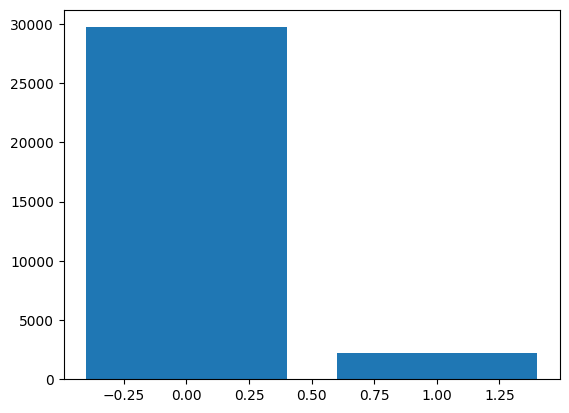

In [6]:
count = {}
for label in df['label']:
    if label in count:
        count[label]+=1
    else:
        count[label]=1
import matplotlib.pyplot as plt
x = count.keys()
y = count.values()
plt.bar(x, y)


In [7]:
ros = RandomOverSampler(sampling_strategy='auto', random_state = 0)

In [8]:
print(df.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [106]:
X_data = df.filter(['tweet'], axis=1)
y_data = df.filter(['label'], axis=1)

In [107]:
X_res, y_res = ros.fit_resample(X_data, y_data)
X_res = X_res.values
y_res = y_res.values.ravel()

In [121]:
X_res = np.array([np.array(w[0]) for w in X_res])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.1,random_state= 0, shuffle=True)

In [123]:
clf = RandomForestClassifier(n_estimators = 100)

In [124]:
print(X_train.shape)

(53496, 9)


In [125]:
clf.fit(X_train, y_train)
training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(f"Training Accuracy: {training_accuracy*100:.2f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}")

Training Accuracy: 99.96
Test Accuracy: 99.88


In [126]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

In [127]:
cm = confusion_matrix(y_test, y_pred)

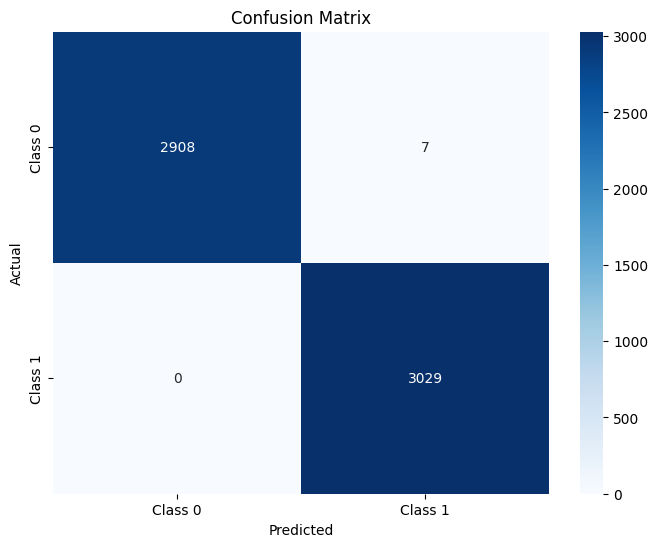

In [128]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [132]:
def test_pre_process(text):
    text = text.strip()
    result = ""
    for char in text:
        if (char.isalpha() and char in string.ascii_letters) or char == ' ':
            result += char
    word_tokens = word_tokenize(result)
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    pos_tags = pos_tag(filtered_sentence)
    lemmatized_words = [
        lemmatizer.lemmatize(word, pos='v') if tag.startswith('V')  
        else lemmatizer.lemmatize(word, pos='n') if tag.startswith('N')
        else lemmatizer.lemmatize(word, pos='a') if tag.startswith('J')
        else word
        for word, tag in pos_tags
    ]
    return ' '.join(lemmatized_words)
def test_tokenize(text):
    global vocab
    word_tokens = word_tokenize(text)
    return [vocab[w] if w in vocab else vocab["<OOV>"] for w in word_tokens]
def standardize(text):
    global vocab
    if len(text) < 9:
        while len(text) != 9:
            text.append(vocab['<PAD>'])
    return text[:9]
text = "no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins"
text = test_pre_process(text)
text = test_tokenize(text)
text = standardize(text)
text = np.array(text).reshape(1, -1)

In [133]:
print(text)

[[14772 16750 17513  6972  5287 10990  5287 36208 36208]]


In [134]:
y_pred = clf.predict(text)
print(y_pred)

[1]
